<a href="https://colab.research.google.com/github/shirsh12/-ABTN0105-Play-Store-App-Review-Analysis---Capstone-Project/blob/main/Shirsh_Verma_%5BABTN0105%5DPlay_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#GOAL : **Explore and analyze the data to discover key factors responsible for app engagement and success.**

####importing necessary libaries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

####We have to datasets in our project


*   PlayStore Data.csv
*   User Reviews.csv



####Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Loading the datasets

In [ ]:
google_playstore_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Project I/Play Store Data.csv')

In [ ]:
usrev_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Project I/User Reviews.csv')

In [ ]:
google_playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
usrev_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


####List of columns available in both our datasets

In [ ]:
#playstore dataset column
google_playstore_df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

###Detail description of columns



1.   App -Application name
2.   Category- Category the app belongs to
3.   Rating-Overall user rating of the app
4.   Reviews-Number of user reviews for the app
5.   Size-Size of the app
6.   Installs-Number of user downloads/installs for the app
7.   Type-Paid or Free
8.   Price-Price of the app
9.   Content Rating-Age group the app is targeted at — Children / Mature 21+ / Adult
10.  Genres-An app can belong to multiple genres For eg, a musical family game will belong to
11.  Last Updated- Date when was the application last updated.
12.  Current ver -Current version of the app
13.  Android ver -Which android version the app can supports.


In [ ]:
#user review dataset column
usrev_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

##Detail description of columns



1.   App -Application name
2.   Translated_Review - Translation of review given by user in english language
3.   Sentiment - Sentiment of user as in Positive or Negative parameter
4.   Sentiment_Polarity- It defines the orientation of the expressed sentiments
5.   Sentiment_Subjectivity- It generally refer to personal opinion  that mostly sentiment is a public opinion and not a factual information.



#####Checking Number of columns and rows


In [ ]:
print(f'The Google Playstore dataset has Rows: {google_playstore_df.shape[0]} and Columns: {google_playstore_df.shape[1]}')

The Google Playstore dataset has Rows: 10841 and Columns: 13


In [ ]:
print(f'The User Review dataset has Rows: {usrev_df.shape[0]} and Columns: {usrev_df.shape[1]}')

The User Review dataset has Rows: 64295 and Columns: 5


#Data Processing and Cleanning.
#Deep diving into each aspects before removing or replacing

###Sanity Check for google Playstore ratings dataset

In [ ]:
#Descriptive statistics
google_playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


###In general app rating cannot be 19 its seem obviously absurd lets explore

####Using Boxplot method to visualize it

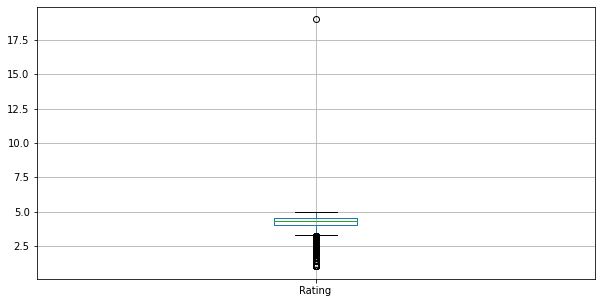

In [ ]:
google_playstore_df.boxplot(figsize=(10,5)) 


####Here we can see there is a rating far away from other ratings

In [ ]:
google_playstore_df[google_playstore_df['Rating'] > 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


###Removing 10472 due to data mismatch in the column

In [ ]:
google_playstore_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [ ]:
#removing row 10472
google_playstore_df.drop(google_playstore_df.index[10472], inplace=True)


In [ ]:
#finding null values
google_playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

####visualizing the missing data values as below using heatmap() method

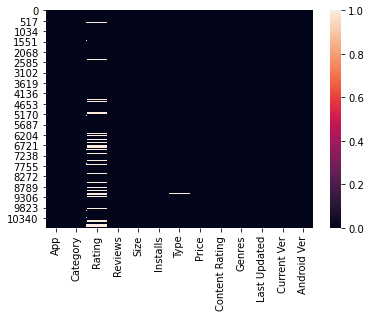

In [ ]:
sns.heatmap(google_playstore_df.isnull())

#####We observed that Rating has more missing value same as above

####Checking for duplicates as a single app information can be present again

In [ ]:
print(f'There are in total {google_playstore_df.duplicated().sum()} duplicate rows in this dataset')

There are in total 483 duplicate rows in this dataset


In [ ]:
google_playstore_df.drop_duplicates(inplace=True)

In [ ]:
#checking
google_playstore_df.duplicated().sum()

0

###Null values now after removing duplicates still we got 1465 Null rows in rating column

In [ ]:

google_playstore_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

###Checking Type of Data we have in each column

In [ ]:
google_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


####No. of installs and Price are an object type?

In [ ]:
google_playstore_df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10357, dtype: object

###Removing '+' from the values of number of installs and converting it to numeric

In [ ]:
#Using map function to apply rstrip method to remove the + sign from Installs Column which is the no. of installs of an app
google_playstore_df['Installs'] = google_playstore_df['Installs'].map(lambda x: x.rstrip('+'))

####Converting the price column into int type using apply function

In [ ]:
#google_playstore_df['Price'] = google_playstore_df['Price'].map(lambda x: int(x))

#####ValueError: invalid literal for int() with base 10: ($4.99)


This mean due to this $ sign Price column type is object

Removing '$' from the values of Price and converting it to numeric

In [ ]:
google_playstore_df['Price'] = pd.to_numeric(google_playstore_df['Price'].str.replace('$',''))

In [ ]:

#google_playstore_df['Installs'] = google_playstore_df['Installs'].map(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '10,000'
we again encounter that while changing its type to int there
are some rows which have comma(,) in the Installs thus preventing it from changing

Removing ',' from the values of Installs and converting it to numeric

In [ ]:
google_playstore_df['Installs'] = pd.to_numeric(google_playstore_df['Installs'].str.replace(',',''))

In [ ]:
google_playstore_df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10357, dtype: object

###dtype of review is showing object hence converting it to numeric

In [ ]:
google_playstore_df['Reviews'] = google_playstore_df['Reviews'].map(lambda x: int(x))

In [ ]:
#cross checking
google_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [ ]:
#final statistics
google_playstore_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10357,10357,8892.000000,1.035700e+04,10357,1.035700e+04,10356,10357.000000,10357,10357,10357,10349,10355
unique,9659,33,NaN,NaN,461,NaN,2,NaN,6,119,1377,2831,33
top,ROBLOX,FAMILY,NaN,NaN,Varies with device,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,NaN,1526,NaN,9591,NaN,8382,842,298,1302,2379
mean,NaN,NaN,4.187877,4.059046e+05,NaN,1.415776e+07,NaN,1.030800,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.522377,2.696778e+06,NaN,8.023955e+07,NaN,16.278625,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.200000e+01,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,1.680000e+03,NaN,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,4.641600e+04,NaN,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Total apps present in the dataset after removing the duplicates
google_playstore_df['App'].shape[0]

10357

In [ ]:
#No. of unique Apps in the dataset
google_playstore_df['App'].nunique()

9659

In [ ]:
print(f'There are around {10357-9659} apps which are not unique!')

There are around 698 apps which are not unique!


###As we can see from the above mentioned data, there are 9659 unique apps out of 10357 .Let's check out if there data is identical or not for these 698 non unique ones 


In [ ]:
google_playstore_df['App'].value_counts().reset_index().sort_values('App',ascending=False).rename(columns={'index':'App','App':'No. of Different Versions'}).head(23)

,App,No. of Different Versions
0,ROBLOX,9
1,8 Ball Pool,7
2,Zombie Catchers,6
4,Bubble Shooter,6
3,Helix Jump,6
10,Subway Surfers,5
14,Granny,5
12,Angry Birds Classic,5
11,Duolingo: Learn Languages Free,5
13,slither.io,5


In [ ]:
google_playstore_df[google_playstore_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
google_playstore_df[google_playstore_df['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


##As we can see from the above dataframe, ROBLOX and 8 Ball Pool app are having identical rows with difference in Genres they both are in **Games** genres but simultaneously are available in Family and Sports. It may have happened that for the same app, the data have been scraped in different points of time or version of apps might be different for different countries like **Netflix India doesnot released 17+ Anime series though it release it in Japan and Phillipines**. App content is different from what its available in India  . Due to this the genres are different.So I have kept row of an app with maximum number of reviews, assuming it to be the latest one and neglecting the Genres factor and assuming the apps are in generalised version.(Accesible to all group of people).


###using .drop_duplicate methods to remove the multiple genres app and keeping only the one with highest reviews

#####Before that I am sorting the my datasets in ascending order 
#####this keep ='last' in .drop_duplicates method will ensure that after removing all the similar apps 
#####with different genres only the ones with higher **reviews** are remained

In [ ]:
google_playstore_df.sort_values('Reviews',ascending=True,inplace=True)
google_playstore_df.drop_duplicates('App',keep='last',inplace=True) 

In [ ]:
#quick check its working !!!!
google_playstore_df[google_playstore_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
google_playstore_df[google_playstore_df['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1871,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [ ]:
google_playstore_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
#final statistics
google_playstore_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,8196.000000,9.659000e+03,9659,9.659000e+03,9658,9659.000000,9659,9659,9659,9651,9657
unique,9659,33,NaN,NaN,461,NaN,2,NaN,6,118,1377,2819,33
top,Wemep - Special price representative (special ...,FAMILY,NaN,NaN,Varies with device,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1875,NaN,NaN,1228,NaN,8904,NaN,7903,828,252,1055,2205
mean,NaN,NaN,4.173267,2.168041e+05,NaN,7.798170e+06,NaN,1.097231,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.536253,1.831430e+06,NaN,5.376973e+07,NaN,16.851618,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,9.690000e+02,NaN,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,2.945350e+04,NaN,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


##Handling Missing Values


1.   To avoid any outlier issue I am replacing the null values by median for my Ratings columns.
2.   Replacing the 1 null value in Type column with Type top value 'Free'.
3.  In the current version and latest version column I am dropping them because they mostly contain vague information which is not that insightfull from my perspective,so for now I am not going to use them for current EDA. Might include them in a later stage, when I have a good exposure to various kind of datasets. 



In [ ]:
google_playstore_df['Rating'].fillna(4.173084,inplace=True)

In [ ]:
google_playstore_df['Type'].fillna('Free',inplace=True)

In [ ]:
google_playstore_df.fillna('Missing',inplace=True)

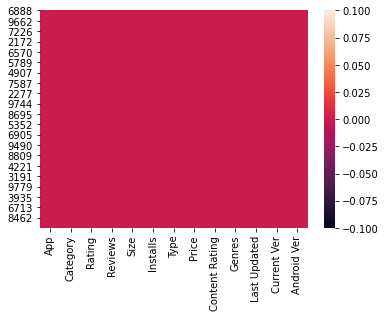

In [ ]:
#quick check for null values using heatmaps
sns.heatmap(google_playstore_df.isnull())  ### no null values

#Sanity check for UserReview Dataset

In [ ]:
#finding null values 
usrev_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

The user review data has almost 50%(26868 out of 64295) of its rows empty!!!


####A single app has multiple reviews so we will use groupby function to find the average Sentiment Polarity and Subjectivity

#####Before that we will check for duplicates

In [ ]:
usrev_df.duplicated().sum()

33616

In [ ]:
#dropping duplicates
usrev_df.drop_duplicates(inplace=True)

In [ ]:
#cross checking
usrev_df.duplicated().sum()

0

In [ ]:
#Actual Null values
usrev_df.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

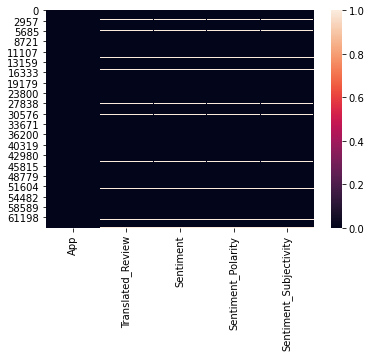

In [ ]:
#using heatmap to visualize it
sns.heatmap(usrev_df.isnull())


###We observe that except App name more or less every column has missing values same as above as we got.

In [ ]:
usrev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


###Data Types of all column are correct

In [ ]:
#Descriptive statistics
usrev_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,30679,29692,29697,29697.000000,29697.000000
unique,1074,27994,3,NaN,NaN
top,Facebook,Good,Positive,NaN,NaN
freq,131,137,19015,NaN,NaN
mean,NaN,NaN,NaN,0.188836,0.490848
std,NaN,NaN,NaN,0.355672,0.266029
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.350000
50%,NaN,NaN,NaN,0.157143,0.514286
75%,NaN,NaN,NaN,0.422500,0.652500


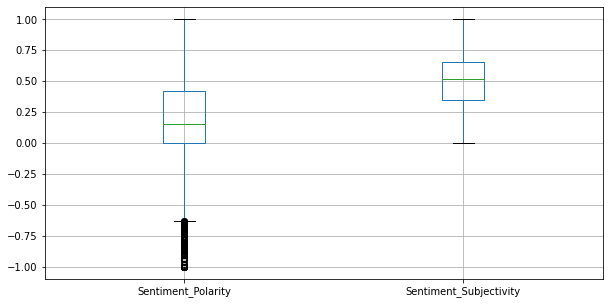

In [ ]:
usrev_df.boxplot(figsize=(10,5)) 



1.   Range of Sentiment_Polarity must be -1 to 1 which we can see.
2.   Also Range of Subjectivity is 0 to 1 which is also fine
3.   We can clearly see there are total 29692 translated	reviews out of them only 27994 are unique.



In [ ]:
print(f'In translated_review column {29692-27994} reviews are not unique!!')

In translated_review column 1698 reviews are not unique!!


Let's check out if there Reviews is identical or not for these 1698 non unique ones.

In [ ]:
#using groupby function to find the counts of each review given to a paricular app
usrev_df['Translated_Review'].value_counts().reset_index().sort_values('Translated_Review',ascending=False).rename(columns={'index':'Translated_Review','Translated_Review':'No. of repetitions'}).head(14)

,Translated_Review,No. of repetitions
0,Good,137
1,Nice,105
2,Great,90
3,Love,81
4,I love,55
5,Awesome,55
6,Very good,51
7,I like,43
8,good,41
9,Cool,38


In [ ]:
usrev_df[usrev_df['Translated_Review']=='Good'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
40,10 Best Foods for You,Good,Positive,0.7,0.6
387,1LINE – One Line with One Touch,Good,Positive,0.7,0.6
406,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Good,Positive,0.7,0.6
609,2RedBeans,Good,Positive,0.7,0.6
2351,A+ Mobile,Good,Positive,0.7,0.6


In [ ]:
usrev_df[usrev_df['Translated_Review']=='Great'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
200,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.8,0.75
436,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Great,Positive,0.8,0.75
601,2RedBeans,Great,Positive,0.8,0.75
909,4 in a Row,Great,Positive,0.8,0.75
2355,A+ Mobile,Great,Positive,0.8,0.75


##From the above two tables I have come to the conclusion that these terms ** Good , Nice, Great** are a generalised rating terms used by many Users.
## I personally also most of the times use these generalised keyword ratings for a app.
## Different people can give different kind of reviews for a same app.So in our coming analysis we can use this columns which doesnot contribute a lot as we cannot get any insight from these terms. 'Good','Great' etc in general sound similar.
## Thus will mostly be focussing on **Sentiment_Polarity**	and **Sentiment_Subjectivity columns.**

In [ ]:
usrev_df.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [ ]:
usrev_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,30679,29692,29697,29697.000000,29697.000000
unique,1074,27994,3,NaN,NaN
top,Facebook,Good,Positive,NaN,NaN
freq,131,137,19015,NaN,NaN
mean,NaN,NaN,NaN,0.188836,0.490848
std,NaN,NaN,NaN,0.355672,0.266029
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.350000
50%,NaN,NaN,NaN,0.157143,0.514286
75%,NaN,NaN,NaN,0.422500,0.652500


##Handling Missing Values


1.   To avoid any outlier issue I am replacing the null values by median for Sentiment_Polarity  and	Sentiment_Subjectivity.
2.   Replacing the null values in Translated_Review column with  top value 'Good' and in Sentiment column by its top value 'Positive'.


In [ ]:
usrev_df['Sentiment_Polarity'].fillna(0.157143,inplace=True)

In [ ]:
usrev_df['Sentiment_Subjectivity'].fillna(0.514286,inplace=True)

In [ ]:
usrev_df['Translated_Review'].fillna('Good',inplace=True)

In [ ]:
usrev_df['Sentiment'].fillna('Good',inplace=True)

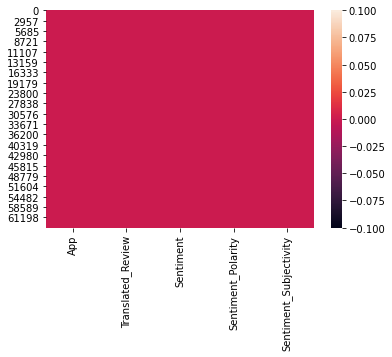

In [ ]:
#checking using heatmap
sns.heatmap(usrev_df.isnull())


###creating  copies of our datasets to avoid data impurity in later stages

In [ ]:
#creating a copy of our datasets to avoid data impurity in later stages
play_df = google_playstore_df.copy()
user_df = usrev_df.copy()

###**To find the factors which affects the sucess rate of an App on playstore I am developing some model question to get better insights on each feature present in our dataset.**

##Model Question 1 :
#Q.Which category apps are currently in demand on the appstore?

#####So basic assumption one can make here is that whichever app category is present in large no. in the playstore are the most demanded one.

###Lets Verify

#Finding Insights with help of Data Visualisation Libraries on various features available.
Matplotlib and Seaborn

In [ ]:
play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

##The following problem can be achieved by Visual Representation of classification of different number of apps present on Playstore on the basis of there **respective Genres**/Category.

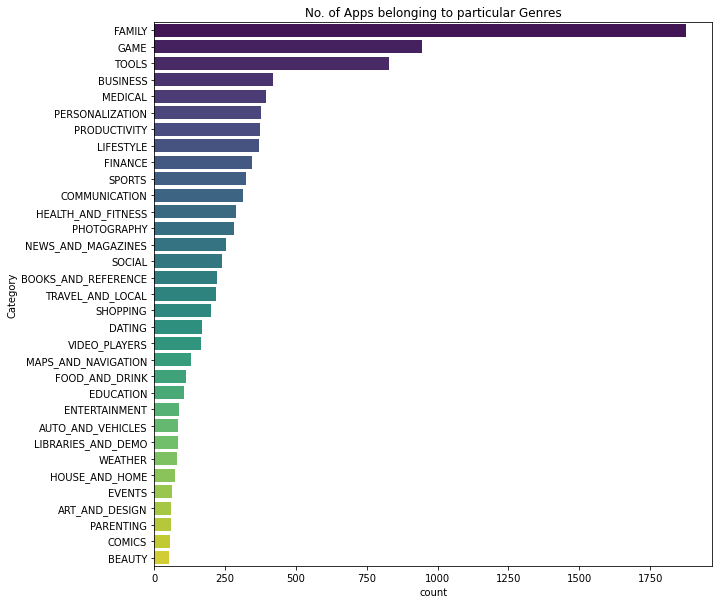

In [ ]:
#using countplot from seaborn
fig,ax1=plt.subplots(figsize=(10,10))
plt.xlabel('Genres')
plt.title('No. of Apps belonging to particular Genres')
sns.countplot(y='Category',data=play_df,ax=ax1,palette='viridis',order=play_df.value_counts('Category',ascending=False).index)
plt.show()

##Thus,In the Genres, the category **'Family'** has the top position followed by **'Game'** in terms of there number of counts.

###Plotting a same hisplot graph but now comparing the Genres of the apps available in the playstore with the respect to there installation figure.

## **Genres Vs No. of Installations**

In [ ]:
#maximum and minimum no. of installation of the apps present in dataset
play_df['Installs'].max(),play_df['Installs'].min()

(1000000000, 0)

####The Install column contains very pretty big int values with huge variance among them. Hence in order to increase  data readibilty and for proper visualisation I am scaling them down by diving them by its max value.

In [ ]:
#scaling
play_df['Installs'] = play_df['Installs'].apply(lambda x: round(x/play_df['Installs'].max(),2))

In [ ]:
#using groupby function to get the tabular representaion of above dataset problem
play_df.groupby('Genres')['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)


,Genres,Installs
35,Communication,11.10
107,Tools,8.16
81,Productivity,5.83
100,Social,5.54
80,Photography,4.73
...,...,...
86,Puzzle;Education,0.00
34,Comics;Creativity,0.00
12,Art & Design;Pretend Play,0.00
76,Parenting;Brain Games,0.00


In [ ]:
#sorting the groupby table in descending order wrt no. of installations
genres_install_count =play_df.groupby('Genres')['Installs'].sum().reset_index().sort_values(by='Installs',ascending=False)

In [ ]:
genres_install_count.tail(10)

,Genres,Installs
93,Role Playing;Education,0.0
17,Board;Brain Games,0.0
89,Racing;Pretend Play,0.0
72,Music & Audio;Music & Video,0.0
11,Art & Design;Creativity,0.0
86,Puzzle;Education,0.0
34,Comics;Creativity,0.0
12,Art & Design;Pretend Play,0.0
76,Parenting;Brain Games,0.0
85,Puzzle;Creativity,0.0


###While plotting the barplot I found that lot many apps have very low installation tending to 0(due to scaling) , hence I am only taking the top 10 apps with high number of installations in my barplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


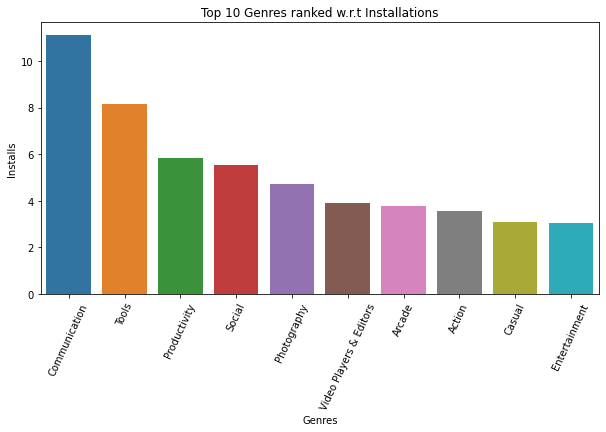

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=65)
plt.title('Top 10 Genres ranked w.r.t Installations')
sns.barplot(genres_install_count['Genres'].head(10),genres_install_count['Installs'].head(10))
plt.show()

#Insights on Category columns and there number of installation.


1.   In the **Genres Vs Count plot we find that in the Genres, or category column** **'Family'** has the top position followed by **'Game'** in terms of there number of counts. 
2.   In the **Genres Vs No. of Installations** we find that
in the **Genres, or category column** **'Communication'** has the top position followed by **'Tools'** in terms of there number of Installations. 



# ANSWERED Q.Which category apps are currently in demand on the appstore?

###Communication and Tools category apps

##My thoughts:
I personally feel that the reason why the no. of **family** and **game category apps** present in app store are inversely proportional to there number of installations,Whereas **Communication** and **Tools** apps have installations irrespective of there numbers  are :

1.   **Age category**:They are mainly being developed for  small children **less than 10 years** in age for entertainment purpose.

2.   Application **engagement** is **restricted** by there **parents** as they cannot keep personal smartphones from a very little age.So a lot of parents restrict there children from downloading these app.

3.  Thus though these apps are available  in large number on playstores there installations are very less.

4.  Whereas **Communication** and **Tools** apps are used by all people to be particular by all age groups above 12 years of age have one or more Accounts on these apps for personal , business or educational purposes.
5. Reasons for there being in less in number are:
        

       *   **High Maintenace cost**, A big company like Facebook,Zoom,Whatsapp etc has to ensure a lot of credential security to there user.
       *   Lot of features are provided in a single app
    *   Proper advertisement of app is required for its sucess
      *   Regular updates
      *   And a very huge capital is required for its day to day functioning in backend.

      *   Tool category apps like CamScanner are used for both educational and business purposes.
      Hence due to these reasons they are limited in numbers.



####Extra exploration

####Top 5 apps in Communication genres with large no. of installations are:
1 here means 10E6

In [ ]:
play_df.loc[play_df['Genres']=='Communication'][['App','Installs']].reset_index().sort_values(by='Installs',ascending=False).head(5)

,index,App,Installs
314,336,WhatsApp Messenger,1.0
302,451,Gmail,1.0
313,382,Messenger – Text and Video Chat for Free,1.0
299,464,Hangouts,1.0
308,391,Skype - free IM & video calls,1.0


###Top 5 apps in Tools genres with large no. of installations are:

In [ ]:
play_df.loc[play_df['Genres']=='Tools'][['App','Installs']].reset_index().sort_values(by='Installs',ascending=False).head(5)

,index,App,Installs
821,3234,Google,1.0
827,4005,Clean Master- Space Cleaner & Antivirus,0.5
818,3235,Google Translate,0.5
808,3265,Gboard - the Google Keyboard,0.5
820,3255,SHAREit - Transfer & Share,0.5


##Model Question 2 :
#Q.For any given app, the number of installation is important or its ratings or the genre it belongs?

So a basic assumption one can make here is that whichever app has high ratings in playstore are the most succesful ones.

##But first we will try to find overall ratings of the apps present in the playstore in general.

In [ ]:
play_df.groupby('Genres')['Rating'].mean().reset_index().head()

,Genres,Rating
0,Action,4.243183
1,Action;Action & Adventure,4.316667
2,Adventure,4.178715
3,Adventure;Action & Adventure,4.300000
4,Adventure;Brain Games,4.600000


In [ ]:
genres_and_ratings= play_df.groupby('Genres')['Rating'].mean().reset_index()

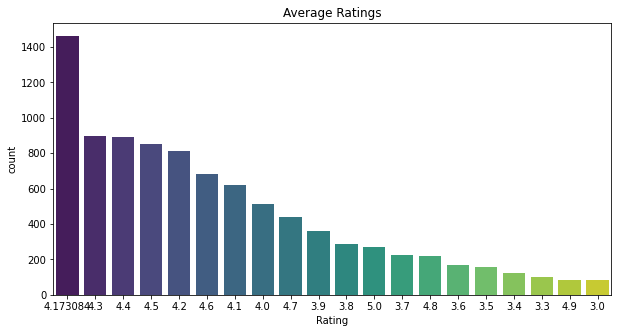

In [ ]:
#using countplot from seaborn
fig,ax1=plt.subplots(figsize=(10,5))
plt.title('Average Ratings')
sns.countplot(x='Rating',data=play_df,ax=ax1,palette='viridis',order=play_df.value_counts('Rating',ascending=False).head(20).index)
plt.show()

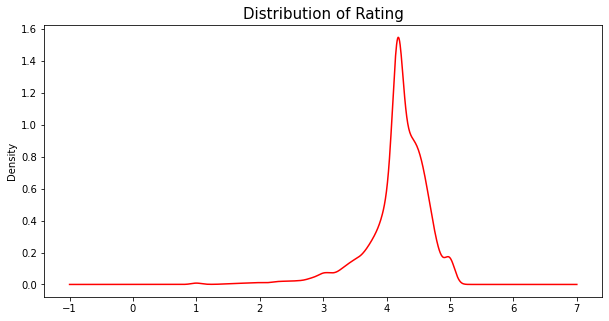

In [ ]:
# plotting the density plot for 'Ratings' of all apps using plot.density()
plt.figure(figsize=(10,5)) 
play_df.Rating.plot.density(color='red') 
plt.title('Distribution of Rating',size = 15)
plt.show()


###After looking above plots we can see that most of the apps have 4.1+ rating

####Now Trying to find relationship between genres of apps and there ratings using groupby function and then plotting it.


##Finding Average Ratings of apps wrt to there Genres

In [ ]:
genres_and_ratings.sort_values('Rating', ascending =False, inplace=True)

In [ ]:
genres_and_ratings.head(24)

,Genres,Rating
18,Board;Pretend Play,4.800000
34,Comics;Creativity,4.800000
63,Health & Fitness;Education,4.700000
4,Adventure;Brain Games,4.600000
86,Puzzle;Education,4.600000
104,Strategy;Action & Adventure,4.600000
73,Music;Music & Video,4.533333
54,Entertainment;Creativity,4.533333
108,Tools;Education,4.500000
106,Strategy;Education,4.500000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


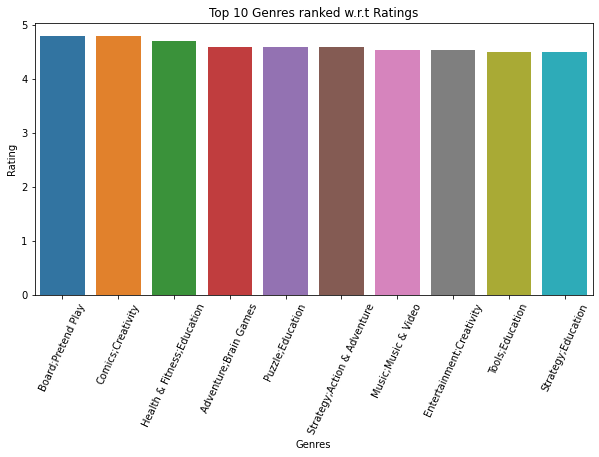

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=65)
plt.title('Top 10 Genres ranked w.r.t Ratings')
sns.barplot(genres_and_ratings['Genres'].head(10),genres_and_ratings['Rating'].head(10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


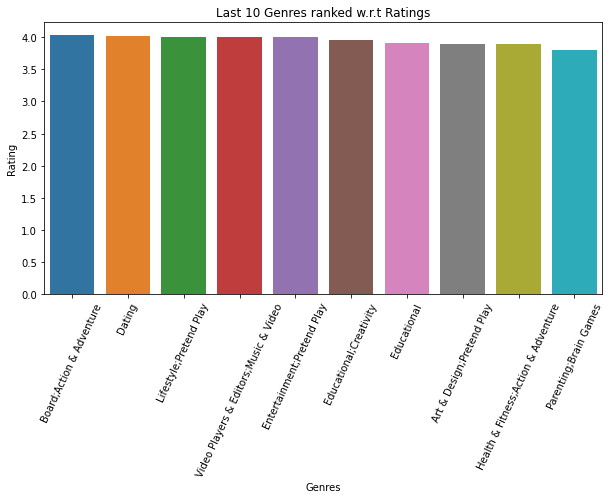

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=65)
plt.title('Last 10 Genres ranked w.r.t Ratings')
sns.barplot(genres_and_ratings['Genres'].tail(10),genres_and_ratings['Rating'].tail(10))
plt.show()

#Insights


1.   From the Above to barplots we come to know that Ratings in general doesnot provide any helpful insights
because more or less a large number of apps on average in a particular genres have 4.0+ ratings on playstores are highly rated.



##My thoughts


1.   This behaviour could be happened because of bot reviews.I have a hunch that most of the **app reviews are given by bots or are paid**.
2.   To increase the engagements of apps they are falsely rated?
3.   Or Is it that ratings have any relationship with reviews



#Q.**What makes Google Store Apps get higher rating?**
##### Is it that apps with large no. of reviews are highly rated?
##### Then what kind of reviews Good, Bad etc which review sentiments affects the app rating in total?


##Correlation between Rating and Review
 I wanted to know is if there is any correlation between number of the reviews and the rating scores. For example, when the apps get high number of the reviews that might be because they really like the apps or they really hate the apps.

In [ ]:
play_df['Reviews'].max(),play_df['Reviews'].min(),play_df['Reviews'].mean()

(78158306, 0, 216804.11036339166)

In [ ]:
#scaling the reviews column to decrease the variation between the reviews column data using mean value
play_df['Reviews'] = play_df['Reviews'].apply(lambda x: round(x/play_df['Reviews'].max(),2))

In [ ]:
#Now looks good
play_df['Reviews'].sort_values(ascending=False).head()

2544    1.00
336     0.88
2604    0.85
382     0.72
1879    0.57
Name: Reviews, dtype: float64

###Correlation matrix for Reviews and Ratings

In [ ]:
play_df[['Reviews','Rating']].corr()

,Reviews,Rating
Reviews,1.000000,0.052772
Rating,0.052772,1.000000


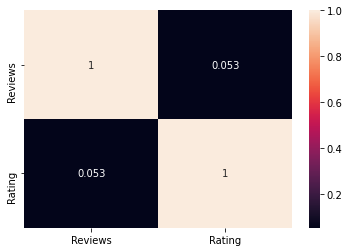

In [ ]:
#representing the above correlation matrix using seaborn heatmap
sns.heatmap(play_df[['Reviews','Rating']].corr(), annot=True)
plt.show()

ploting the correlation graph between 'Reviews' and 'Ratings'

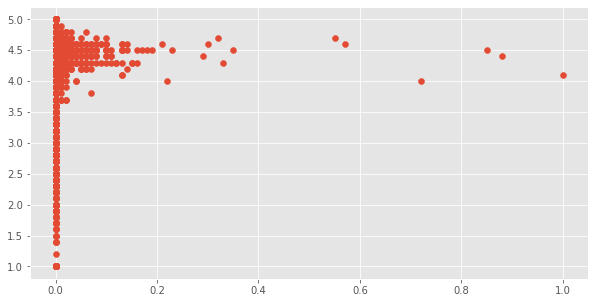

In [ ]:
matplotlib.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.scatter(play_df['Reviews'],play_df['Rating'])
plt.show()

##We can see that there are many apps with large number of reviews around 4.5 rating. But the correlation is 0.053, so there is no strong correlation here.

##Correlation between Rating and Installation

Here again I wanted to know is if there is any correlation between number of the Installation and the rating scores. For example, when a app has high or low installation then might it also affects its ratings.

#####Correlation matrix for Installs and Ratings

In [ ]:
google_playstore_df[['Installs','Reviews']].corr()

,Installs,Reviews
Installs,1.000000,0.625058
Reviews,0.625058,1.000000


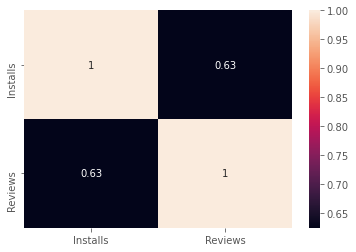

In [ ]:
#representing the above correlation matrix using seaborn heatmap
sns.heatmap(google_playstore_df[['Installs','Reviews']].corr(), annot=True)
plt.show()

We can see that there is a strong correlation between the no. of installs app and reviews made.**0.63** which is very huge more than half.

###**But again correlation might not be the reason for causation.**
####But for now we can safely assume that higher the ratings of an app more it is downloaded by the people.

#Model Question 3 :
#Q.In general how many apps belonging to particular category/genres are available for free or paid on the playstore.

In [ ]:
#finding the counts of all type of apps present in the dataset
play_df['Type'].value_counts()

Free    8905
Paid     754
Name: Type, dtype: int64

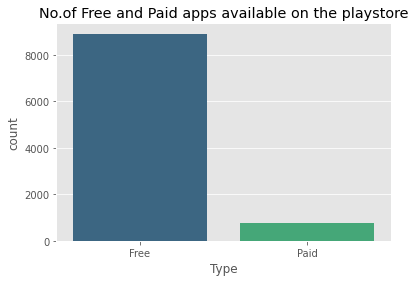

In [ ]:
#using countplot from seaborn
plt.xlabel('Type')
plt.title('No.of Free and Paid apps available on the playstore')
sns.countplot(x='Type',data=play_df,palette='viridis')
plt.show()

###There is also a price column available in our dataset lets cross verified the above plot with it.

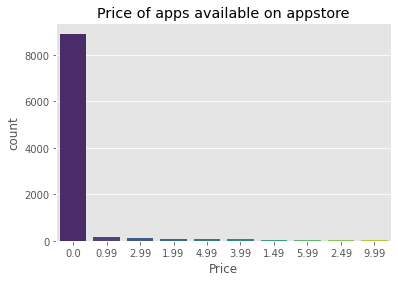

In [ ]:
#using countplot from seaborn
plt.xlabel('Price')
plt.title('Price of apps available on appstore')
sns.countplot(x='Price',data=play_df,palette='viridis',order=play_df.value_counts('Price',ascending=False).head(10).index)
plt.show()

In [ ]:
play_df['App'].shape[0]

9659

###Out of 9659 apps available 8905 are free.

##Insights:
Out of 9659 apps available 8905 are free.

##My thought:
In general most of the apps which are available on playstore have **in-app payment services** to avail some sort of premium service depending on apps to apps
e.g: Spotify,YouTube Premium etc.

**Other Reasons might are**
Some apps are distributed for free through app stores; the developers make money in a few ways: Some sell advertising space within the app. The app developers can earn money from the ads, so they distribute the app for free to reach as many users as possible.

#Model Question 4 :
#Q.How does size impact on the number of installs of any application?

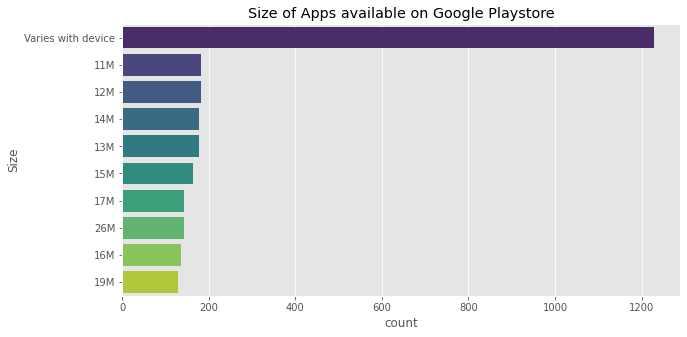

In [ ]:
#using countplot from seaborn
fig,ax1=plt.subplots(figsize=(10,5))
plt.xlabel('Count')
plt.ylabel('Size of Apps')
plt.title('Size of Apps available on Google Playstore')
sns.countplot(y='Size',data=play_df,ax=ax1,palette='viridis',order=play_df.value_counts('Size',ascending=False).head(10).index)
plt.show()

#Insights:
Size of the application is  based on the device. We can clearly observe that Size column has top value **Varies with device**.Apart from that in general size of most of the apps available in the playstore falls in between the range of 12MB to 26MB

##Let's check is this have any effect on installation rate of the apps?

Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.


In [ ]:
play_df['Size'] = play_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_df['Size'] = play_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_df['Size'] = play_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_df['Size'] = play_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
play_df['Size'] = play_df['Size'].apply(lambda x: float(x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


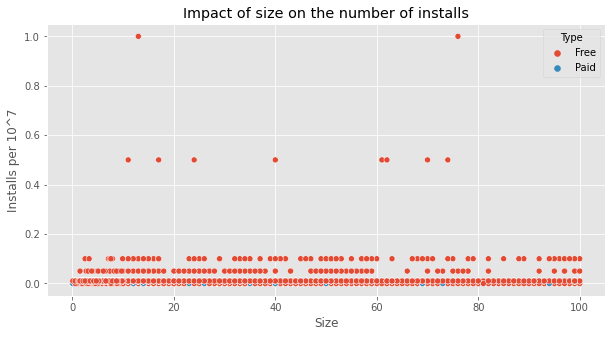

In [ ]:
#using scatterplot to establish is there any relationship between no. of downloads and app size
plt.figure(figsize=(10,5))
plt.title('Impact of size on the number of installs')
plt.ylabel('Installs per 10^7')
sns.scatterplot(play_df['Size'], play_df['Installs'],hue=play_df['Type'])
plt.show()

#Answered Q.How does size impact on the number of installs of any application?

##Final Insights:
1.It is pretty much evident from the above mentioned plot that size may impact the number of installations. Bulky applications are less installed by the user.

2. Also None of the bulky apps are paid ones


##Model Question 5: **From above these insights we now want to know what kind of apps are present in Paid type and what are there genres and ratings and range of prices.**

In [ ]:
paid_app_df=play_df.loc[play_df['Type']=='Paid']

####Finding the Highest paid Apps

In [ ]:
paid_app_df.sort_values('Price',ascending=False)[['App','Price','Category']].head(5)

,App,Price,Category
4367,I'm Rich - Trump Edition,400.00,LIFESTYLE
5373,I AM RICH PRO PLUS,399.99,FINANCE
4362,💎 I'm rich,399.99,LIFESTYLE
5369,I am Rich,399.99,FINANCE
5358,I am Rich!,399.99,FINANCE


Thus the highest paid app available in my appstore belongs to Lifestyle and Finance Category 

In [ ]:
print(f'There are in total {paid_app_df.shape[0]} paid apps in our dataset.')

There are in total 754 paid apps in our dataset.


In [ ]:
#using value_counts to find genres these apps belong
paid_app_df['Genres'].value_counts().reset_index().head().rename(columns={'index':'Genres','Genres':'No.of Paid Apps'})

,Genres,No.of Paid Apps
0,Medical,82
1,Personalization,81
2,Tools,78
3,Education,30
4,Books & Reference,28


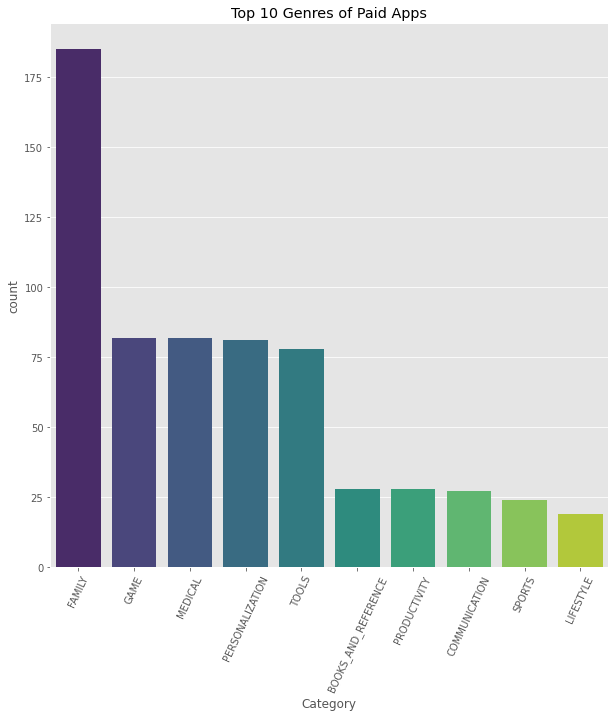

In [ ]:
#using countplot from seaborn
fig,ax1=plt.subplots(figsize=(10,10))
plt.xlabel('Genres')
plt.xticks(rotation=65)
plt.title('Top 10 Genres of Paid Apps')
sns.countplot(x='Category',data=paid_app_df,ax=ax1,palette='viridis',order=paid_app_df.value_counts('Category',ascending=False).head(10).index)
plt.show()

Here we found out that again most of the paid apps belong to Family Genres followed bny Games but there are three new genre categories in top 5: they are **Medical and Personalisation** category apps.


####Finding the highly rated paid apps

In [ ]:
paid_app_df[(paid_app_df['Genres']=='Medical')].sort_values('Price',ascending=False)[['Category','Rating','Price']].head()

,Category,Rating,Price
9719,MEDICAL,4.173084,200.00
2253,MEDICAL,4.600000,79.99
2390,MEDICAL,4.173084,74.99
2414,MEDICAL,4.000000,39.99
2301,MEDICAL,3.500000,33.99


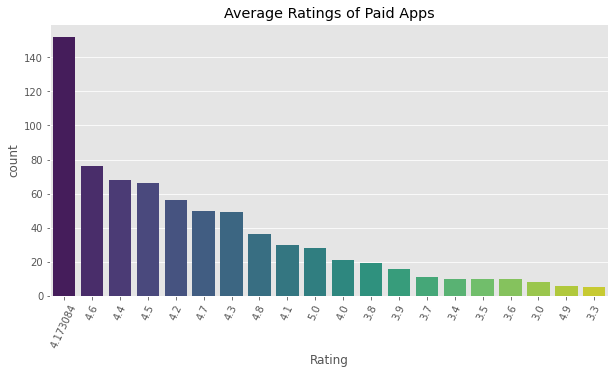

In [ ]:
#using countplot from seaborn
fig,ax1=plt.subplots(figsize=(10,5))
plt.xticks(rotation=65)
plt.title('Average Ratings of Paid Apps')
sns.countplot(x='Rating',data=paid_app_df,ax=ax1,palette='viridis',order=paid_app_df.value_counts('Rating',ascending=False).head(20).index)
plt.show()

#Insights:
Here we found out that again most of the paid apps belong to Family Genres followed bny Games but there are three new genre categories in top 5: they are **Medical and Personalisation** category apps.

###On exploration of Medical Category app I find that:
1.   These apps are very highly rated mostly 4.1+
2.   They have pretty good prices. 

###My thought:
These apps might basically provide important medical services like consulting a doctor, ordering and prescribing medicines etc. that's why they charge very huge price.

#Exploration on user_review dataset
This dataset contains three important columns: 

1.   **Sentiment**: It  basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral
2.   **Sentiment Polarity** : It is a float type encodation of a users reviews which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
3.   **Sentiment Subjectivity**:It generally refers to personal opinion, emotion or judgment, which is followed by all people in general,it lies in the range of [0,1].




#Model Question 6:
#What is the distribution of percentage of Review Sentiments across the datasets


In [ ]:
user_df['Sentiment'].value_counts()

Positive    19015
Negative     6321
Neutral      4361
Good          982
Name: Sentiment, dtype: int64

####Converting the rows having **'Good'** sentiment value in **'Positive'** because more or less the lingual meaning of both these keywords are same.

In [ ]:
user_df.loc[user_df['Sentiment']=='Good'] = 'Positive'

In [ ]:
#cross check
user_df['Sentiment'].value_counts()

Positive    19997
Negative     6321
Neutral      4361
Name: Sentiment, dtype: int64

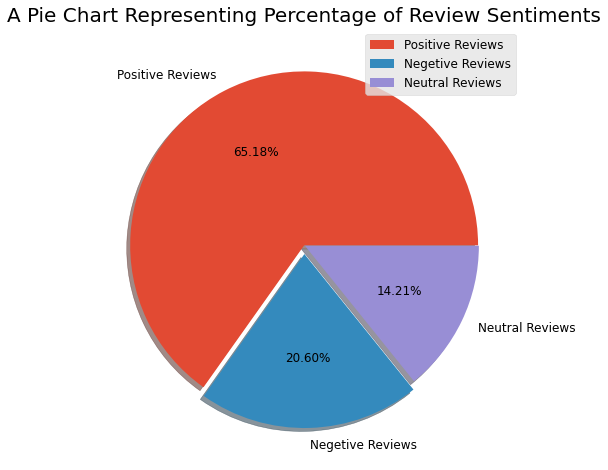

In [ ]:
sentiment_list = list(user_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(sentiment_list, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()



##Insights:
###As we can see from this pie chart in general most of the users on playstore give **Positive** Ratings to most of the apps.

##We can check this above data with exploration we found while cleaning the **Translated Review column** most of these generic keywords tend towards a Positive sentiments.

In [ ]:
#using groupby function to find the counts of each review given to a paricular app
usrev_df['Translated_Review'].value_counts().reset_index().sort_values('Translated_Review',ascending=False).rename(columns={'index':'Translated_Review','Translated_Review':'No. of repetitions'}).head(14)

,Translated_Review,No. of repetitions
0,Good,1124
1,Nice,105
2,Great,90
3,Love,81
4,I love,55
5,Awesome,55
6,Very good,51
7,I like,43
8,good,41
9,Cool,38


##MODEL Question 7 :
####**Q.What is the Distribution of Average Sentiment Polarity and Subjectivity across all genres?**

In [ ]:
usrev_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

######Using groupby function to find  Average Sentiment Polarity and Subjectivity across all apps present in the User review Dataset

In [ ]:
usrev_df.groupby('App')[['Sentiment_Polarity','Sentiment_Subjectivity']].mean().reset_index().rename(columns={'Sentiment_Polarity':'Avg Sentiment_Polarity','Sentiment_Subjectivity':'Avg Sentiment_Subjectivity'}).head()

,App,Avg Sentiment_Polarity,Avg Sentiment_Subjectivity
0,10 Best Foods for You,0.462690,0.493473
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.358227,0.508907
2,11st,0.181294,0.443957
3,1800 Contacts - Lens Store,0.318145,0.591098
4,1LINE – One Line with One Touch,0.195287,0.556212


In [ ]:
Avg_sentiments=usrev_df.groupby('App')[['Sentiment_Polarity','Sentiment_Subjectivity']].mean().reset_index().rename(columns={'Sentiment_Polarity':'Avg Sentiment_Polarity','Sentiment_Subjectivity':'Avg Sentiment_Subjectivity'})



1.   Now Merging the two datasets playstore and above df on the Key='App'
2.   This will add three seperate column containing Avg,polarity and avg subjectivity relating to each unique app



In [ ]:
merged_df = google_playstore_df.merge(Avg_sentiments, on='App')

In [ ]:
merged_df.sort_values('Avg Sentiment_Polarity',ascending=False,inplace=True) #merged df

####Using groupby I am trying to find the **average sentiment polarity** of users in large wrt the **Genres** an app belongs

In [ ]:
genres_polarity=merged_df.groupby('Genres')[['Avg Sentiment_Polarity','Price']].mean().reset_index().sort_values('Avg Sentiment_Polarity',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


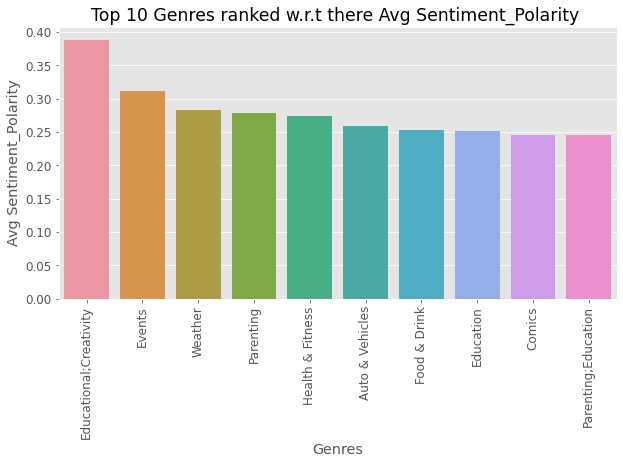

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Genres ranked w.r.t there Avg Sentiment_Polarity ')
sns.barplot(genres_polarity['Genres'].head(10),genres_polarity['Avg Sentiment_Polarity'].head(10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


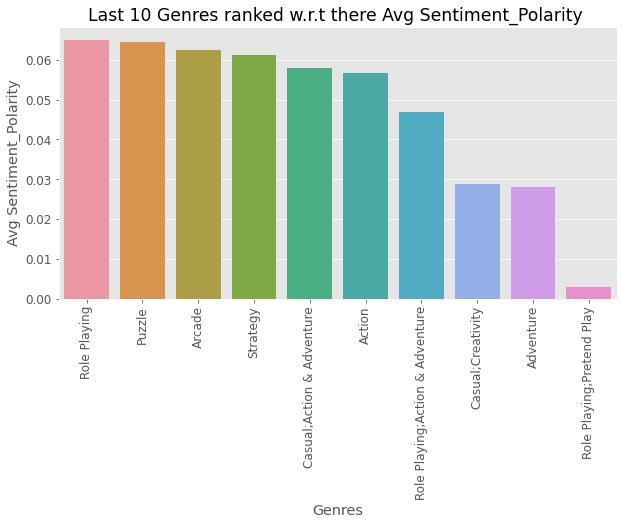

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Last 10 Genres ranked w.r.t there Avg Sentiment_Polarity ')
sns.barplot(genres_polarity['Genres'].tail(10),genres_polarity['Avg Sentiment_Polarity'].tail(10))
plt.show()

##Insights:
#####From the above two Barplots we come to know that:


1.   Average Sentiment Polarity of users of these Genres
**Educational,Events and Weather** is very high.

2.   Average Sentiment Polarity of users of these Genres
**RolePlaying,Events and Weather** is very high.

###My thoughts:
1.   Apps belonging to high Sentiment Polarity are free?
2.   Or they provide very good services ?




###Genres with High Sentiment Polarity are free?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


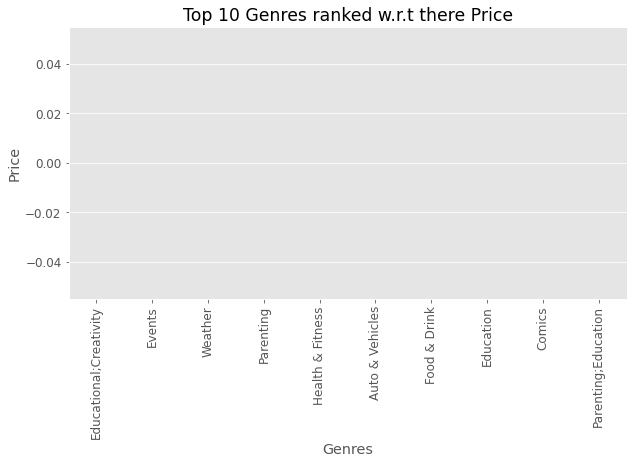

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Genres ranked w.r.t there Price')
sns.barplot(genres_polarity['Genres'].head(10),genres_polarity['Price'].head(10))
plt.show()

####Almost all high Polarity genres apps are free

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


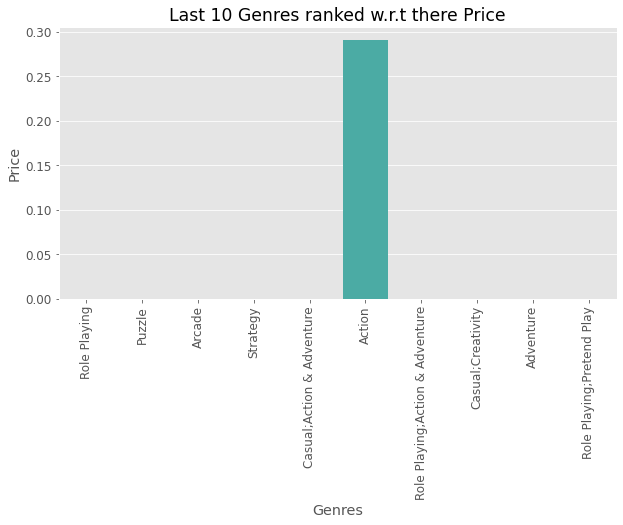

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Last 10 Genres ranked w.r.t there Price')
sns.barplot(genres_polarity['Genres'].tail(10),genres_polarity['Price'].tail(10))
plt.show()

###Here again except Action Genres app all others low Polarity genres apps are free.

#Final thought:
##**From the above two barplot we can finally conclude that almost all genres except Action are freely available on the App store and there pricing doesnot affect there polarity.**

###**Making Same barplot with genres but now taking the Average Sentiment Subjectivity of Users**

In [ ]:
merged_df.sort_values('Avg Sentiment_Subjectivity',ascending=False,inplace=True) #merged df

In [ ]:
genres_subj=merged_df.groupby('Genres')[['Avg Sentiment_Subjectivity','Price']].mean().reset_index().sort_values('Avg Sentiment_Subjectivity',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


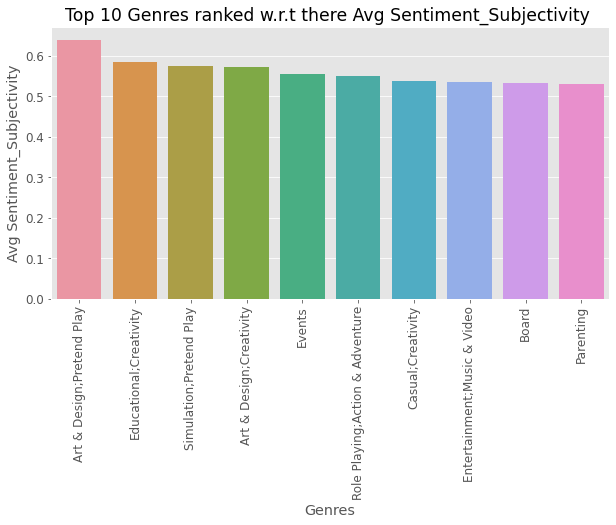

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Genres ranked w.r.t there Avg Sentiment_Subjectivity ')
sns.barplot(genres_subj['Genres'].head(10),genres_subj['Avg Sentiment_Subjectivity'].head(10))
plt.show()

##Insights:
###1.    The average sentiment subjectivity of the users wrt to the top 10 genres are Positive(greater than 0.5)
###2.   We sought to find almost all genres which appeared in **Genres Vs Polarity plot are not  present here.**
###3.  Users in general love apps belonging to Educational,Creativity etc.

####My thoughts:
#### Why its do? Its because they are free?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


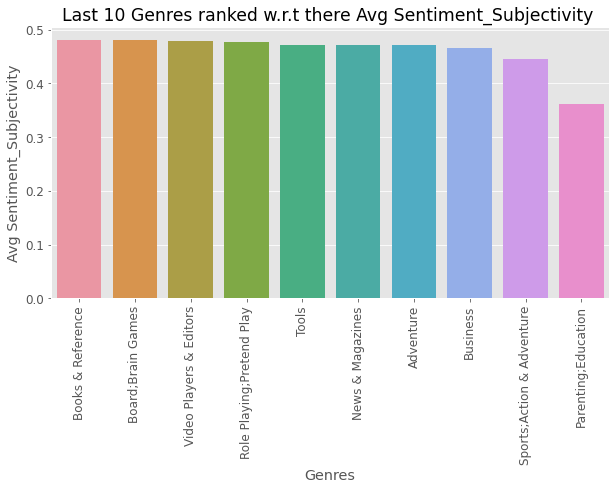

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Last 10 Genres ranked w.r.t there Avg Sentiment_Subjectivity ')
sns.barplot(genres_subj['Genres'].tail(10),genres_subj['Avg Sentiment_Subjectivity'].tail(10))
plt.show()

##Insights:
###1. The average sentiment subjectivity of the users wrt to the top 10 genres are Negative(lesser than 0.5)
###2. We sought to find almost all genres which appeared in **Genres Vs Polarity plot are not present here.**
###3. Users are not happy with apps belonging to Genres News, Video Players,Sports etc.


####My thought:
####Is there behaviour is due to the type of app whether its Free or Paid

##Lets Check?
#Is Price affects Subjectivity score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


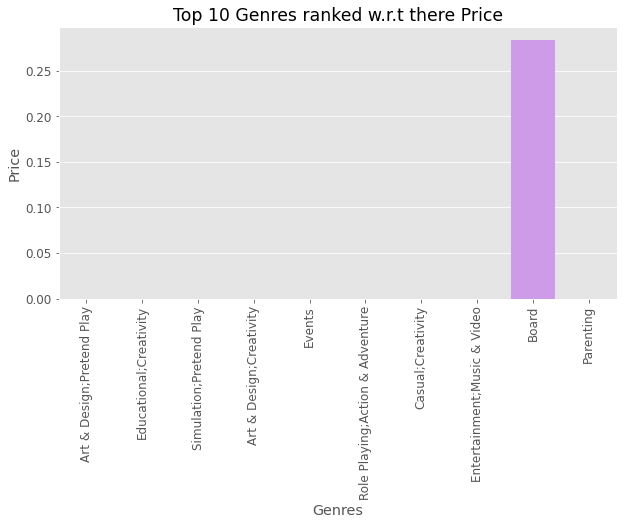

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Top 10 Genres ranked w.r.t there Price')
sns.barplot(genres_subj['Genres'].head(10),genres_subj['Price'].head(10))
plt.show()

##Insights :
###Almost all high subjectivity apps genres are free except **Board**.

###My thoughts:
###Thus Apps in **Board Genres** are very succusseful app because though they are paid they have a very good Sentimental_subjectivity score.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


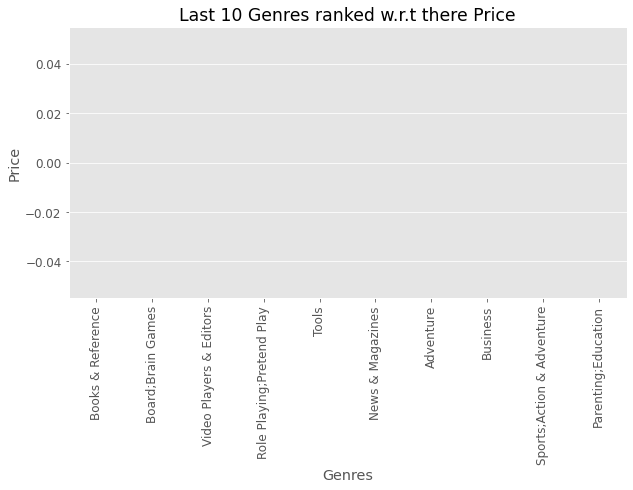

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Last 10 Genres ranked w.r.t there Price')
sns.barplot(genres_subj['Genres'].tail(10),genres_subj['Price'].tail(10))
plt.show()

##From the above two barplot we can finally conclude that almost all genres except Action are freely available on the App store and there pricing doesnot affect there subjectivity.

##Model Question 08:
##Is there any Correlation between Sentiment_Polarity and Sentiment_Subjectivity of the Users?


In [ ]:
#finding correlation matrix 
usrev_df.corr()


,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.272045
Sentiment_Subjectivity,0.272045,1.000000


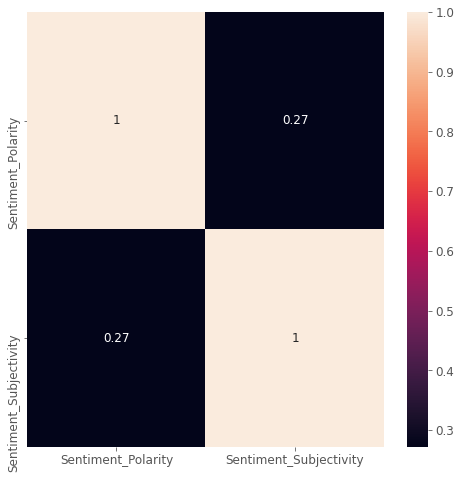

In [ ]:
#representing the above correlation matrix using seaborn heatmap
sns.heatmap(usrev_df.corr(), annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


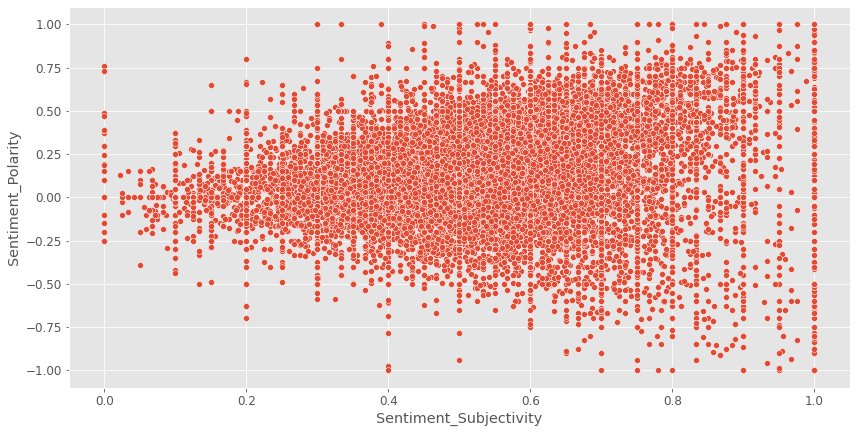

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(usrev_df['Sentiment_Subjectivity'], usrev_df['Sentiment_Polarity'])
plt.show()

**From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low**

#Conclusion

So far, we have learned that the following key factors that might be responsible for app engagement and success.
 *  Which Genres its belongs  
 *   Whether its number of installation matters
 *   Whether it’s Free or Paid.
 *   Number of the reviews.
 *   Sentiment of the review.
 *   Sentiment Polarity and Subjectivity of an app belonging to a particular genres.


###Final Words:
Here I have tried vizualizing various parameters and concept which affect the app engagement and I do think that the Sentimental aspect plays a crucial role in it. We can drew various insights when we copared free vs paid apps as well. This comparison can also give us a clear picture of what the current demand is and accordingly what should be the approach from the supply side as well.

For those apps which are having low ratings the devloper needs to improve rating either by incentivizing ratings or by adding new features to it. They also need to increase the updation time frame inorder tomake sure that every update lifts the customer expereience. There should also be some kind of incentives as most of the customers are not willing to provide ratings until and unless they have a superior or inferior experience.

We also need to consider the number of ratings for every category of app as some high ratings may occur because only few people rate the app which further leads to biased results. Similarly, we should also consider that even if the number of reviews is high the negative sentiments of those reviews will decrease the installations counts which may lead to major issues for the developer